In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
sys.path.insert(1, '/home/nicolas/code/src')
sys.path.insert(1, '/home/nicolas/code/data')

from RBM import RBM
from scipy.integrate import simps
from scipy import stats
import h5py

device = torch.device("cuda")
dtype = torch.float
torch.set_num_threads(4)
data = np.genfromtxt('../data/data_1d2c_bal_seed14.dat')
data = torch.tensor((data+1)/2, device = device, dtype = dtype)



In [2]:
fname = '../data/valGradNorm.h5'
fname2 = '../data/valGradTMC.h5'
f = h5py.File(fname, 'r')
f2 = h5py.File(fname2, 'r')

In [3]:
print(np.array(f['negTermV1']).shape)
#print(np.array(f2['negTermW1']).shape)
#f2.keys()

(1000,)


In [8]:
tmc = np.array(f2['negTermW780'])
norm = np.array(f['negTermW780'])/100

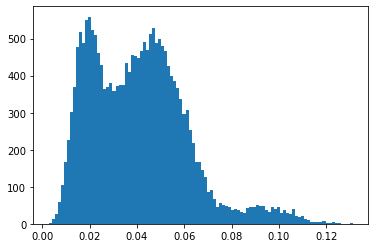

In [9]:
plt.hist(tmc.reshape(20000), bins = 100);

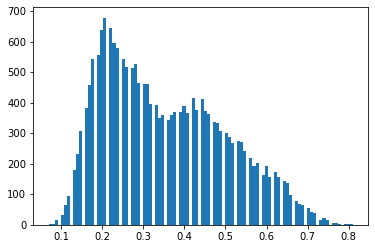

In [10]:
plt.hist(norm.reshape(20000), bins = 100);

In [11]:
norm.shape

(20, 1000)

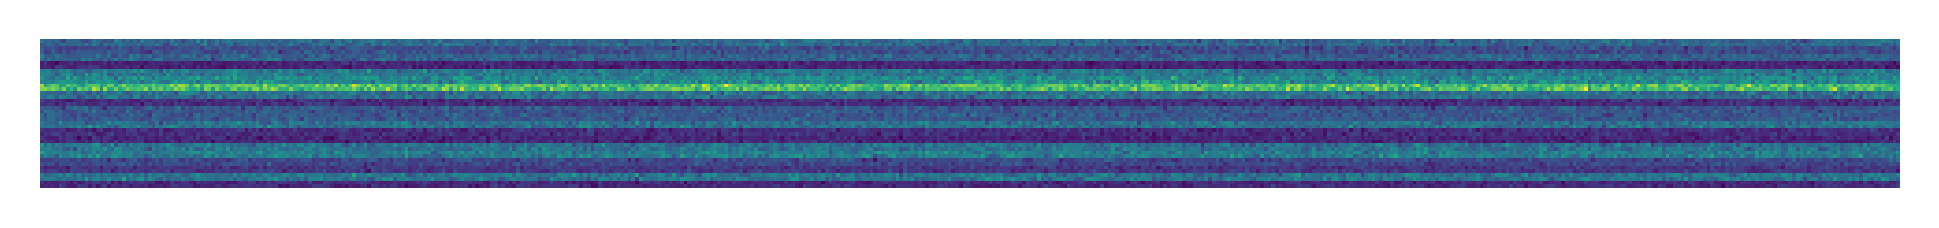

In [12]:
plt.figure(dpi = 400)
plt.axis('off')
plt.imshow(tmc.reshape(40,500))

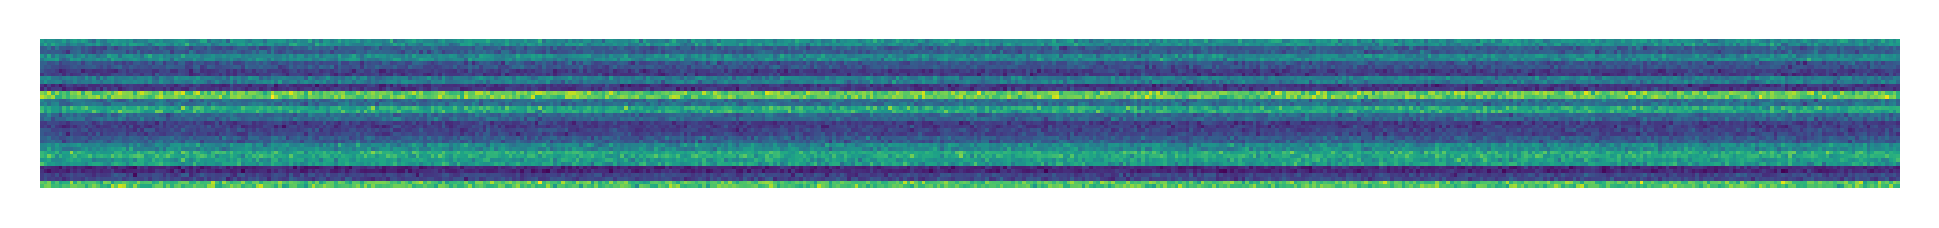

In [13]:
plt.figure(dpi = 400)
plt.axis('off')

plt.imshow(norm.reshape(40,500))

In [14]:
f2.keys()

RuntimeError: Can't determine (addr overflow, addr = 133203056, size = 328, eoa = 133202512)

In [32]:
mean_si_tmc = torch.zeros(48, device = device)
mean_si_norm = torch.zeros(48, device = device)
median_si_tmc = torch.zeros(48, device = device)
median_si_norm = torch.zeros(48, device = device)

for i in range(0, 48):
    print(i)
    if i not in [8]:
        normsi = torch.tensor(f['negTermV'+str(i)], dtype = dtype, device = device)
        tmcsi = torch.tensor(f2['negTermV'+str(i)], dtype = dtype, device = device)
        mean_si_norm[i] = torch.mean(normsi)
        mean_si_tmc[i] = torch.mean(tmcsi)
        median_si_norm[i] = torch.median(normsi)
        median_si_tmc[i] = torch.median(tmcsi)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


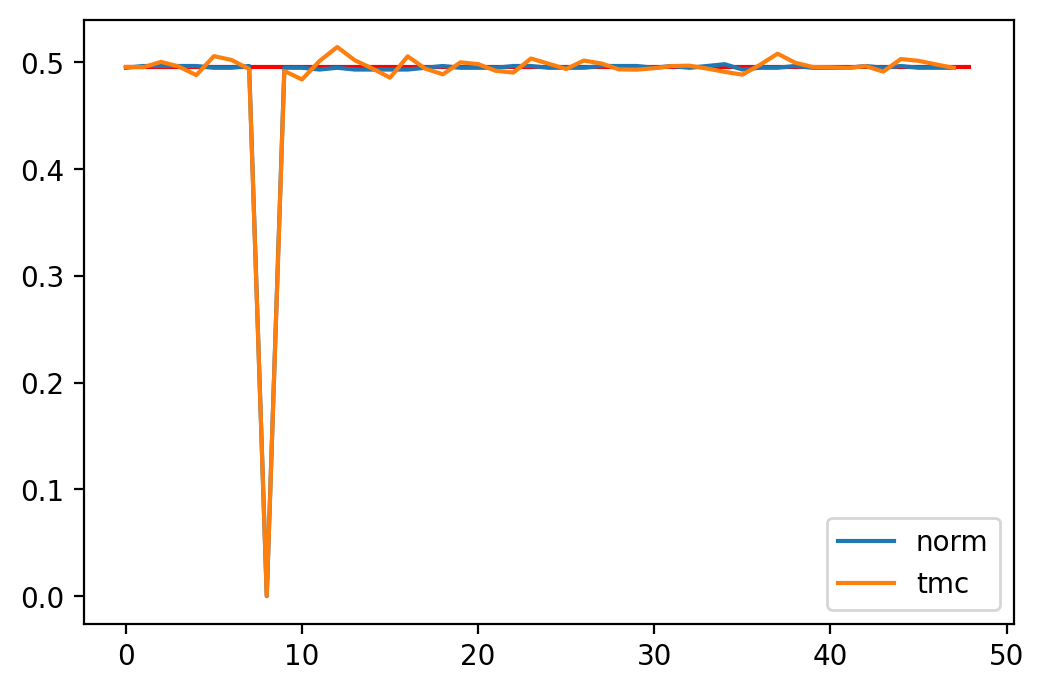

In [35]:
plt.figure(dpi=200)
plt.plot(median_si_norm.cpu()/600, label = 'norm')
plt.plot(median_si_tmc.cpu(), label = 'tmc')
plt.hlines(torch.mean(data).item(), 0,48, color='red')
plt.legend()

In [34]:
torch.median(data)

tensor(0., device='cuda:0')